# Movies Mini Project


---





## Define the Problem



---



### The Problem

Movies vary in popularity and a high-ranking film typically generates greater revenues and success for those involved.

What factors affect a movie's ranking and are rankings generally increasing or decreasing over time?

The Internet Movie Database (IMDB) collects information on films, including actors and production crew involved, the genre, year and rank. We can use this dataset to try and answer our question.

If we are able to identify factors that high ranking movies have in common, we could predict which movies will be successful, based on this data.

## Collect the Data


---

### Data Collection

The [CTU Relational Dataset Repository](https://relational.fel.cvut.cz/) contains numerous SQL databases that can be queried, including one for The IMDB.

Because there are thousands of people involved in the making of an individual movie, we will focus our analysis solely on the directors rather than the entire production team. We will also need to gather data on the genre, year and rank.

In a separate notebook, we have queried the database for the relevant data, which has been converted into a single CSV file.

Below, we import the packages required for this analysis, load the data and view the first five rows.

In [ ]:
# add your code here import packages, load your movies data and view the first 5 rows
import pandas as pd
from google.colab import drive
from google.colab import files
import io

#drive.mount('/content/drive')

#file_path = '/content/drive/MyDrive/Colab_Data/movies.csv'
uploaded = files.upload()

movies_data = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

movies_data.head()


Saving movies.csv to movies.csv


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


## Clean and Transform


---



### Clean the Data

In order to clean the data, we will investigate the data in each column and decide what actions need to be taken.

We will also look at the dataset as a whole to determine how to deal with missing or incomplete data.



---


***Explain the results of your investigation into the data contained in each column of the movies dataset. How will you deal with missing Rank values?***




---





**Evaluating and cleaning of the ‘movies’ dataset**.

I explored the dataset in Excel.

There are 7 columns in the 'movies' dataset:


1.   A - contains unique film ID's;
2.   B - contains first name of the director; data is not consistent as some names are full and others are initials. There are also weird non-standard characters in the text that require removing
3.   C - contains directors’ surnames; clean with a few examples of non-standard characters used. Important! Some movies have more than one director!
4.   D - called 'name' contains movie title. Needs a bit of cleaning as some of the titles are numbers instead of text.
5.   E - production year; doesn't need cleaning.
6.   F - contains rank information (numeric value). Lots of missing data that needs to be dealt with.
7.   G - genre. Each movie can belong to more than one genre category

**Cleaning**
1.	First I decided to remove all rows that are missing the rank information. As the main question of the project is to look into factors that influence film’s ranking, there is no point to include this part of the data to the final analysis. No ranking means no input for the analysis. On the other hand imputing the missing values would require a proper analysis of the various directors popularity/ranking. Dropping the rows containing null values for column 'rank has been done using Python.
2.	Then I focused on the column ‘Title’. To better evaluate the data I sorted it alphabetically by the title name. I noticed that column ‘Title’ contains ~ 100 entries that are numeric instead of text. Looking at the trends in film ranks by different directors over years it the main goal of this project. Thus, the names of the movies are not important for the analysis outcome. Instead of losing time to clean it I decided to leave it as it is.
3.	Columns ‘first_name’ and ‘last_name’ contain lots of weird non-standard characters. I removed them using Python.
4.	Columns ‘first_name’ and ‘last_name’ were combined into one column with a full name of each of the directors and then the original two colums were dropped in Python.






In [ ]:
# add your code here to clean the dataset
import re
# First I will check if there are missing values in the column 'rank'

null_values = movies_data["rank"].isnull().values.any()
print(null_values)

#dropping rows from the dataset where missing values are in column 'rank'
clean_rank_movies_data = movies_data.dropna(subset = ["rank"])

#checking if the 'rank' column still contains null values
null_values = clean_rank_movies_data["rank"].isnull().values.any()
print(null_values)

#removing special characters from columns 'first_name' and 'last_name'

clean_rank_movies_data['first_name'] = clean_rank_movies_data['first_name'].str.replace('[^a-zA-Z0-9_\- ]', '', regex=True)
clean_rank_movies_data['last_name'] = clean_rank_movies_data['last_name'].str.replace('[^a-zA-Z0-9_\- ]', '', regex=True)











True
False


<ipython-input-4-7d614744fc17>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rank_movies_data['first_name'] = clean_rank_movies_data['first_name'].str.replace('[^a-zA-Z0-9_\- ]', '', regex=True)
<ipython-input-4-7d614744fc17>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rank_movies_data['last_name'] = clean_rank_movies_data['last_name'].str.replace('[^a-zA-Z0-9_\- ]', '', regex=True)


### Feature Extraction

We have each director's first and last name in a separate column. It would be preferable to have one column for fullname. Therefore, we will combine them into one column and drop first and last name.

In [ ]:
# add your code here to combine first and last name into full name
clean_rank_movies_data['full_name'] = clean_rank_movies_data['first_name']  + ' ' +  clean_rank_movies_data['last_name']

#dropping first and last name columns
final_clean_movies_data = clean_rank_movies_data.drop(['first_name', 'last_name'], axis = 1)

#saving cleaned and transformed data as csv file
final_clean_movies_data.to_csv('final_clean_movies.csv')
files.download('final_clean_movies.csv')




<ipython-input-5-45de97b7cbda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rank_movies_data['full_name'] = clean_rank_movies_data['first_name']  + ' ' +  clean_rank_movies_data['last_name']




Because the data is already in long format, which is the most appropriate for analysing using visualisation software, we do not need to reshape it. However, we will either need to reshape it or drop duplicate values when investigating the data in Python or Excel.

## Analyse


---



### Summary Statistics

To get an understanding of the dataset as a whole, we will look at the summary statistics of the numeric columns and find out about more about the categorical values.

In [ ]:
# add your code here to display summary statistics for both numeric and non-numeric columns
final_clean_movies_data.describe(include="all")



,Unnamed: 0,name,year,rank,genre,full_name
count,113376.000000,113376,113376.000000,113376.000000,113376,113376
unique,NaN,55954,NaN,NaN,20,22104
top,NaN,Scnario sur la drogue,NaN,NaN,Drama,Friz Freleng
freq,NaN,75,NaN,NaN,24696,1025
mean,184806.412583,NaN,1975.102764,5.995124,NaN,NaN
std,106369.286163,NaN,24.166500,1.540330,NaN,NaN
min,77.000000,NaN,1892.000000,1.000000,NaN,NaN
25%,95164.250000,NaN,1955.000000,5.100000,NaN,NaN
50%,182475.500000,NaN,1981.000000,6.200000,NaN,NaN
75%,277251.250000,NaN,1997.000000,7.100000,NaN,NaN


### Investigating Rank

Our first visualisation is on the rank data, which we have summarised using a histogram.

---


***Explain what your graph shows***




---

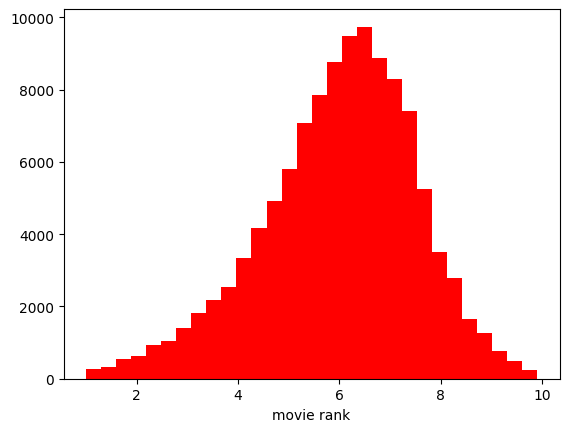

In [ ]:
# add your code here to plot a histogram of rank data
import matplotlib.pyplot as plt

#creating a list of values from the 'rank' column
rank = final_clean_movies_data['rank'].tolist()

#use the list to plot the histogram
plt.hist(rank, bins=30, color='red')
plt.xlabel('movie rank')
plt.show()




The histogram visualizes the distribution of the rank values. It shows that there are no obvious gaps or outliers in the data. Looking at the histogram we can say that rank values between 6 and 7 are the most frequent.

### Investigating Genre

Our next visualisation is on the genre data, for which we have used a bar chart to show the freqency of each category.


---


***Explain what your graph shows***


---

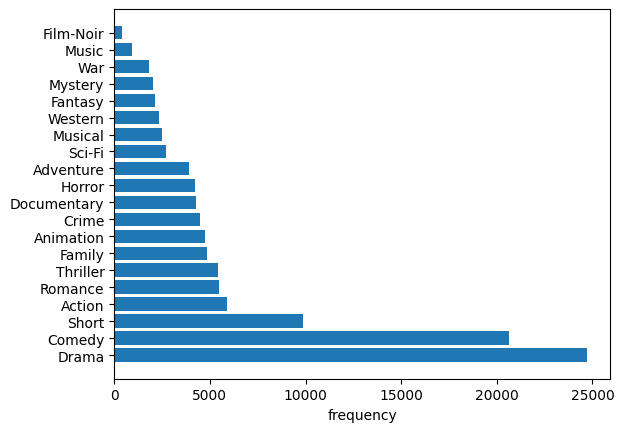

In [ ]:
# add your code here to plot a bar chart of the frequency of the different genres

# Calculating the frequency of each genre using value_counts()
genre_counts = final_clean_movies_data['genre'].value_counts()

# Use the index (genres) and values (counts) from the Series for the bar chart
plt.barh(genre_counts.index, genre_counts.values)

plt.xlabel('frequency')

plt.show()


This bar chart presents the frequency of various genre types. In the movies data we can identify drama, comedy and a short film as the three most frequent genres and the film-noir as the least frequent one.

### Investigating the relationship between rank and year

Our final plot shows the mean rank over time.


---


***Explain what your graph shows***


---

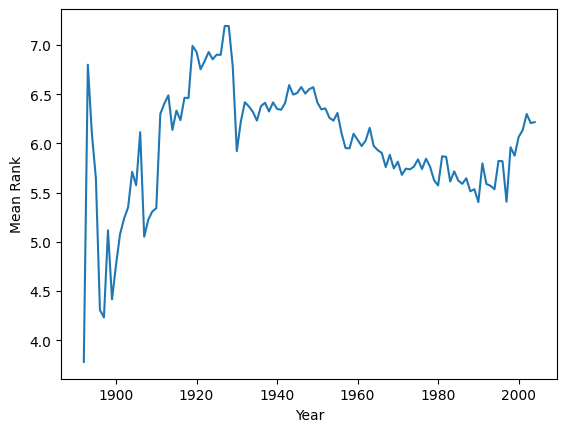

In [ ]:
# add your code here to plot a line graph of mean rank against year

#use groupby() method to group by the 'year' column to find the mean value of the rank over the years
mean_rank_over_time = final_clean_movies_data.groupby("year")["rank"].mean()

# Use the index of the Series (which contains the years) as the x-axis values
plt.plot(mean_rank_over_time.index, mean_rank_over_time)

plt.xlabel("Year")
plt.ylabel("Mean Rank")

plt.show()



To show how the mean rank has been changing over time I used a line plot. It shows that the overal highest mean rank was in years 1915-1925. Since then there was a dicreasing trend up to 1990-ties, when the mean rank started to increase.

## Interpret and Visualise


---




![genre numbers](https://drive.google.com/uc?export=view&id=1O-NZRg3Ik7LbuAtre22kg53oX4_sdmKW)

**Which genre category is the most frequent ?**

The first visualisation is a bar graph exploring frequency of various genre categories in the analysed data. It clearly shows that mostly produced genres are drama, comedy and a short film. Film - Noir, music and war are three least represented genre categories.

![average rank over time](https://drive.google.com/uc?export=view&id=1XQwY-u72lR70BEnP-qs5omoDEB_SOjN0)

**How was the average rank of the movies changing over time?**

The line plot shows fluctuations of the average of movies rank within the researched period of time - over 100 years. We can clearly see that the average rank peaked at the end of the XIX-th century, then dropped suddenly and then was consistently increasing. It reached its maximum (>7) between years 1920 -1930. Since then it has been decreasing again until year 2000.

![Image description](https://drive.google.com/uc?export=view&id=1aHhYnkqvVNQMFV0rgBzq-5ux-Opn3dnD)

**What movie genre has the highest average rank?**

This plot shows that an average rank value depends on the genre. When we look at the whole dataset film-noir is the genre with the highest average rank while horror is the genre with the lowest.

![top movies by genre](https://drive.google.com/uc?export=view&id=1I891ndeiC5DgRWtmu4bqryIZNMA3O5z2)

**When we look at the top movies (with rank >9) - what genre categories are the most frequent?**

This bar chart shows number of top movies from various genre categories. Top movies are those that have rank higher than 9.0. It's interesting to see which genres are most successful - it's a short film, drama, comedy and documentary.

![top movies directors](https://drive.google.com/uc?export=view&id=12H_UvqA6292PQLYxw1ykPBI7xRL3cGCV)

**Which directors produced the top movies?**

I again filtered all movies by rank, selecting only those with rank > 9 (top movies). The bar chart presents names of the directors that produced the 'top movies' as well as genres categories of movies they directed.

## Tell the Story



---



**Project Summary**

Project ‘Movies’ explores factors that influence movies ranking over time. Are we able to identify factors that high ranking movies have in common? To try to answer this question we analysed the data from the Internet Movie Database (IMDB) that collects information on films, including actors and production crew involved, the genre, year and rank. For this project, our analysis focused solely on directors only; we also used data on the genre, year and rank.

1.	Cleaning and transforming of the data and initial analysis were done in Python.
2.	Visualization of the data was done in PowerBI.

**Data insight**

**First page of the PowerBI dashboard**

•	Dataset summary: the clean dataset we used in analysis consisted of 55.94K
ranked movies produced across 113 years and representing 20 genre categories and 22.10K directors.


•	There is a preference for a specific movie genre produced. Over the years ‘drama’ accounted for 21% of the total movie genres while ‘film – noir’ was the least represented. (The bar chart on top right)


•	Interestingly, we can observe that the average rank is changing a lot over time. Average of rank ranged from 3.78 (in 1892) to 7.19 (in 1927). Since 1927 there has been a decreasing trend until around year 2000, when it started to increase again. (The line chart on the left)


•	An average rank value depends on the genre category. When we look at the whole dataset across 113 years, film-noir is the genre with the highest average ranking while horror is the genre with the lowest. (The line chart on the right)
•	The relationship between genre and rank changes depending on the period we look at. For example, in the period 1892 – 1922 ‘family’ was the genre with the highest ranking, while in years 1954 -2004 it was ‘documentary’. (We can explore it by using the time slider on the dashboard.)


•	Are the most produced movie genres also the top ranked ones? Not necessarily. ‘Film-noir’ is the least represented genre in the dataset, but it scores the highest average rank across 113 years, suggesting that movies from this genre must have consistently received high ranking.


**Second page of the PowerBI dashboard**


•	The second page of the PowerBI dashboard looks specifically at the 828 ‘top movies’ that were selected by filtering all movies by rank > 9.


•	The stack column chart on the right shows the directors names of the ‘top movies’, together with information about the movie genres.


•	The column chart on the left shows the frequency of various genre categories for the ‘top movies’, with ‘short’, ‘drama’ and ‘comedy’ being the most frequent. Interestingly, ‘film-noir’ is not even included in this chart (there are only 19 genres in this sub-analysis), meaning that none of the movies from this category have ever had rank higher than 9.


•	By moving the year slider and selecting different periods we can observe how the trends in rankings were changing and which genres have been more frequent as the ‘top movies’.


**Conclusions**

•	Generally, movie rankings are fluctuating over time.

•	It seems that the main factor affecting movie rankings over time is genre.

•	Genre popularity across years is not constant.

•	In most cases there is a positive correlation between the frequency of a specific genre category and its ranking but not always. (‘Film-noir’ is an example of an exception.)

**Next steps**

•	Looking into the link between various genre rankings and the socio-economic events in the history. For example, what was the effect of the IIWW on the different genre categories?

•	Deeper analysis of the link between specific directors and movies ranking.




Link to the PowerBI report:
https://drive.google.com/file/d/1T4H1ckZhLKAouSHTVQDYEj-i6hjitJtL/view?usp=sharing




## Evaluate the Process


---



I am happy with the overal outcome of the project and with the visualization in PowerBI. The most difficult part for me was deciding on how to clean the data and which specific columns of the dataset I should clean. Initially I was planning to do the cleaning step using Excel but it turned out to be too complicated and Python was much quicker. Even though, starting with Excel was good as I had a chance to research the dataset really well.
I don't think I would do anything differently. Maybe I would start the cleaning step straight in Python instead of spending a lot of time trying to do it in Excel.
Completing this project allowed me to practise all steps of the Data Analysis Lifecycle. I learnt how to move from one step to another. It was also the first time I could 'play' with PowerBI and visualize the analysed data.